# Spaceship Titanic

Ахметкин Олег Вадимович, 306 группа

Разведочный анализ данных датасета спейсшип титаник

## Initial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from collections import Counter
sns.set() 

In [2]:
train = pd.read_csv('./train.csv', index_col='PassengerId')
test = pd.read_csv('./test.csv', index_col='PassengerId')

In [3]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [4]:
train.shape

(8693, 13)

In [5]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train.describe(include=['O'])

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8492,8476,8494,8511,8490,8493
unique,3,2,6560,3,2,8473
top,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,4602,5439,8,5915,8291,2


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


есть пропущенные значения

In [8]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [10]:
test.shape

(4277, 12)

In [11]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [12]:
test.describe(include=['O'])

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,4190,4184,4177,4185,4184,4183
unique,3,2,3265,3,2,4176
top,Earth,False,G/160/P,TRAPPIST-1e,False,Cints Erle
freq,2263,2640,8,2956,4110,2


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4185 non-null   object 
 4   Age           4186 non-null   float64
 5   VIP           4184 non-null   object 
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
 11  Name          4183 non-null   object 
dtypes: float64(6), object(6)
memory usage: 434.4+ KB


In [14]:
test.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

## Filling in the gaps

In [15]:
train_test_data = [train, test]

### CryoSleep, VIP, Transported

In [16]:
print(Counter(train['CryoSleep']))
bool_features = ['CryoSleep', 'VIP']
for dataset in train_test_data:
    for i in dataset.index:
        for feature in bool_features:
            if dataset.loc[i, feature] not in [True,False]:
                dataset.loc[i, feature] = random.choice([True,False])
Counter(train['CryoSleep'])

Counter({False: 5439, True: 3037, nan: 217})


Counter({False: 5540, True: 3153})

### HomePlanet, Destination

In [17]:
train['HomePlanet'] = train['HomePlanet'].fillna(random.choice(['Mars','Earth','Europa']))
test['HomePlanet'] = test['HomePlanet'].fillna(random.choice(['Mars','Earth','Europa']))
train['Destination'] = train['Destination'].fillna(random.choice(['TRAPPIST-1e','PSO J318.5-22','55 Cancri e']))
test['Destination'] = test['Destination'].fillna(random.choice(['TRAPPIST-1e','PSO J318.5-22','55 Cancri e']))

### Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

In [18]:
list_of_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for feature in list_of_features:
    train[feature] = train[feature].fillna(train[feature].mean())
    test[feature] = test[feature].fillna(test[feature].mean())

### Cabin

In [19]:
deck = []
side = []
deck_t = []
side_t = []
for i in train.index:
    if str(train.loc[i,"Cabin"]) == 'nan':
        deck.append(random.choice(['B','C']))
        side.append(random.choice(['S','P']))
    else:  
        deck.append(train.loc[i,"Cabin"][0])
        side.append(train.loc[i,'Cabin'][-1])
for i in test.index:
    if str(test.loc[i,"Cabin"]) == 'nan':
        deck_t.append(random.choice(['B','C']))
        side_t.append(random.choice(['S','P']))
    else:  
        deck_t.append(test.loc[i,"Cabin"][0])
        side_t.append(test.loc[i,'Cabin'][-1])

train['Deck'] = deck
train['Side'] = side
test['Deck'] = deck_t
test['Side'] = side_t

### Drop Cabin, Name

In [20]:
train = train.drop(columns=['Cabin', 'Name'])
test = test.drop(columns=['Cabin', 'Name'])


In [21]:
train.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Side            0
dtype: int64

## Feature Extraction

### New Column: TotalMoney

In [22]:
train['TotalMoney'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test['TotalMoney'] = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

<Axes: xlabel='Transported', ylabel='TotalMoney'>

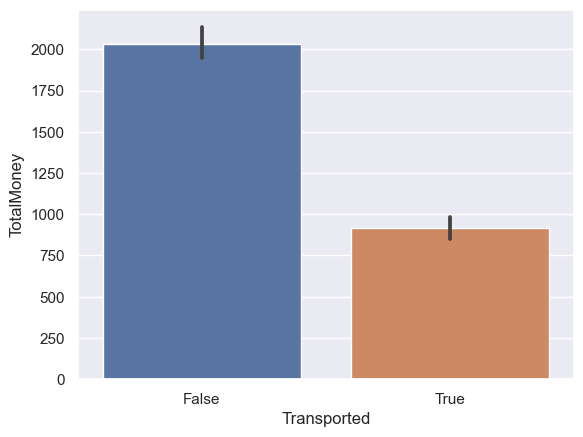

In [23]:
sns.barplot(x='Transported', y='TotalMoney', data=train)

The total amount of money spent by the passenger greatly affects the transportation

In [24]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,TotalMoney
PassengerId,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,0.0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,736.0
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,10383.0
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,5176.0
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,1091.0


### Side

In [25]:
side_dict = {'P': 0, 'S': 1}
train['Side'] = train['Side'].apply(lambda x: side_dict.get(x))
test['Side'] = test['Side'].apply(lambda x: side_dict.get(x))

### CryoSleep, VIP, Transported

In [26]:
bool_mapping = {'False': 0, 'True': 1}
bool_features = ['CryoSleep', 'VIP']

for name in bool_features:
    train[name] = train[name].astype(int)
    test[name] = test[name].astype(int)
train['Transported'] = train['Transported'].astype(int)

### Age

In [27]:
age_group = []

for i in train.values:
  if i[3] <= 12:
    age_group.append('0-12')
  elif 18 >= i[3] >= 13:
    age_group.append('13-18')
  elif 25 >= i[3] >= 18 :
    age_group.append('19-25')
  elif 30 >= i[3] >= 26 :
    age_group.append('26-30')
  elif 50 >= i[3] >= 31 :
    age_group.append('31-50')
  elif i[3] >= 51 :
    age_group.append('>50')          
train['AgeGroup'] = age_group

In [28]:
age_group_test = []

for i in test.values:
  if i[3] <= 12:
    age_group_test.append('0-12')
  elif 18 >= i[3] >= 13:
    age_group_test.append('13-18')
  elif 25 >= i[3] >= 18 :
    age_group_test.append('19-25')
  elif 30 >= i[3] >= 26 :
    age_group_test.append('26-30')
  elif 50 >= i[3] >= 31 :
    age_group_test.append('31-50')
  elif i[3] >= 51 :
    age_group_test.append('>50')          
test['AgeGroup'] = age_group_test

In [29]:
train = train.drop(columns='Age')
test = test.drop(columns='Age')

In [30]:
train.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,TotalMoney,AgeGroup
PassengerId,,,,,,,,,,,,,,
0001_01,Europa,0,TRAPPIST-1e,0,0.0,0.0,0.0,0.0,0.0,0,B,0,0.0,31-50
0002_01,Earth,0,TRAPPIST-1e,0,109.0,9.0,25.0,549.0,44.0,1,F,1,736.0,19-25
0003_01,Europa,0,TRAPPIST-1e,1,43.0,3576.0,0.0,6715.0,49.0,0,A,1,10383.0,>50
0003_02,Europa,0,TRAPPIST-1e,0,0.0,1283.0,371.0,3329.0,193.0,0,A,1,5176.0,31-50
0004_01,Earth,0,TRAPPIST-1e,0,303.0,70.0,151.0,565.0,2.0,1,F,1,1091.0,13-18


### RoomService, Spa, VRDeck, TotalMoney, FoodCourt, ShoppingMall

In [31]:
num_col = ['RoomService', 'Spa', 'VRDeck', 'TotalMoney', 'FoodCourt', 'ShoppingMall']
for col in num_col:
  train[col] = (train[col] - train[col].min()) / (train[col].max() - train[col].min())
  test[col] = (test[col] - test[col].min()) / (test[col].max() - test[col].min())

### HomePlanet, Destination, Deck

In [32]:
from sklearn.preprocessing import LabelEncoder

ohe_col = ['HomePlanet', 'Destination', 'Deck', 'AgeGroup']

def label_encoder(train, test, columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train1, test1 = label_encoder(train, test, ohe_col)

<Axes: >

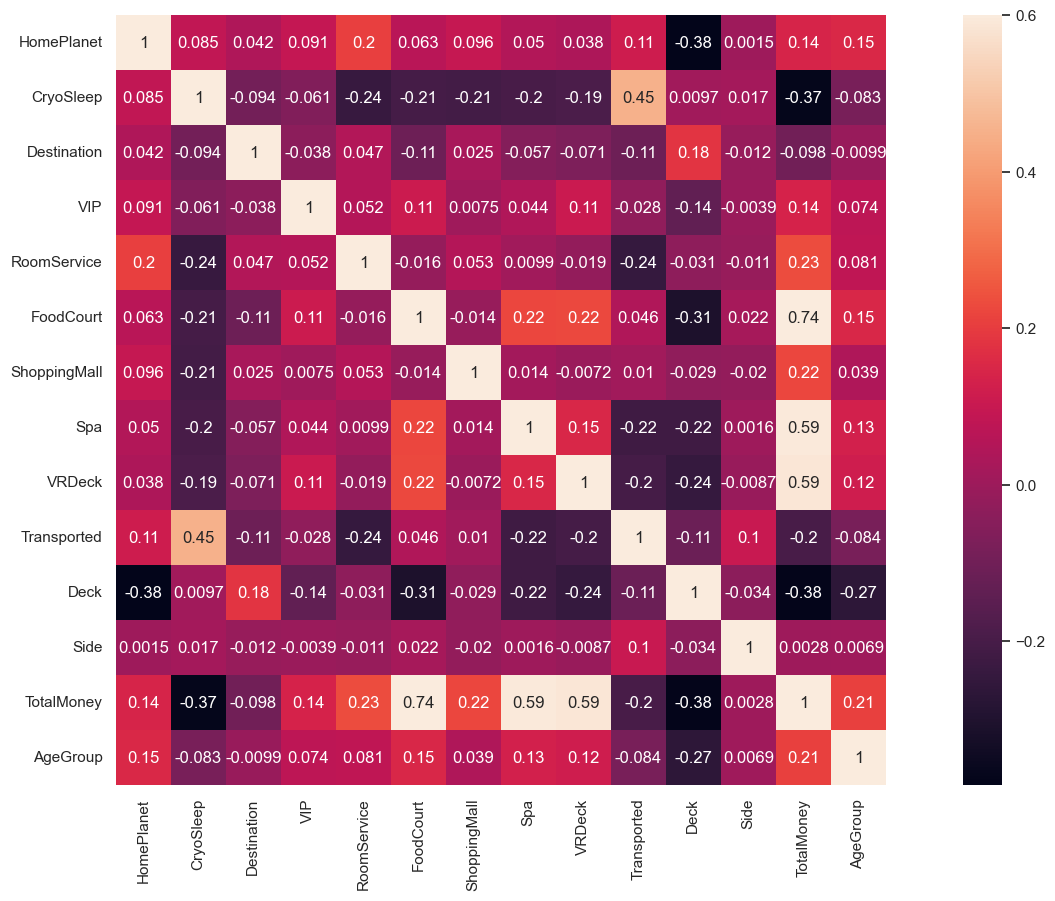

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(train1.corr(), vmax=0.6, square=True, annot=True)

The columns are most affected: CryoSleep, RoomService, Spa, VRDeck, TotalMoney

The columns are the least affected: VIP, FoodCourt, ShoppingMall. They can be deleted

In [34]:
train = pd.get_dummies(train, columns=ohe_col)
test = pd.get_dummies(test, columns=ohe_col)

In [35]:
drop_col = ['VIP', 'FoodCourt', 'ShoppingMall']
train = train.drop(columns=drop_col)
test = test.drop(columns=drop_col)

## Result

In [36]:
train.head()

,CryoSleep,RoomService,Spa,VRDeck,Transported,Side,TotalMoney,HomePlanet_0,HomePlanet_1,HomePlanet_2,...,Deck_4,Deck_5,Deck_6,Deck_7,AgeGroup_0,AgeGroup_1,AgeGroup_2,AgeGroup_3,AgeGroup_4,AgeGroup_5
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,0,0.000000,0.000000,0.000000,0,0,0.000000,False,True,False,...,False,False,False,False,False,False,False,False,True,False
0002_01,0,0.007608,0.024500,0.001823,1,1,0.020452,True,False,False,...,False,True,False,False,False,False,True,False,False,False
0003_01,0,0.003001,0.299670,0.002030,0,1,0.288521,False,True,False,...,False,False,False,False,False,False,False,False,False,True
0003_02,0,0.000000,0.148563,0.007997,0,1,0.143830,False,True,False,...,False,False,False,False,False,False,False,False,True,False
0004_01,0,0.021149,0.025214,0.000083,1,1,0.030317,True,False,False,...,False,True,False,False,False,True,False,False,False,False


In [37]:
test.head()

,CryoSleep,RoomService,Spa,VRDeck,Side,TotalMoney,HomePlanet_0,HomePlanet_1,HomePlanet_2,Destination_0,...,Deck_4,Deck_5,Deck_6,Deck_7,AgeGroup_0,AgeGroup_1,AgeGroup_2,AgeGroup_3,AgeGroup_4,AgeGroup_5
PassengerId,,,,,,,,,,,,,,,,,,,,,
0013_01,1,0.000000,0.000000,0.000000,1,0.000000,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
0018_01,0,0.000000,0.142260,0.000000,1,0.084120,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False
0019_01,1,0.000000,0.000000,0.000000,1,0.000000,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
0021_01,0,0.000000,0.009121,0.026266,1,0.220341,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
0023_01,0,0.000865,0.000000,0.000000,1,0.019159,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False


<Axes: >

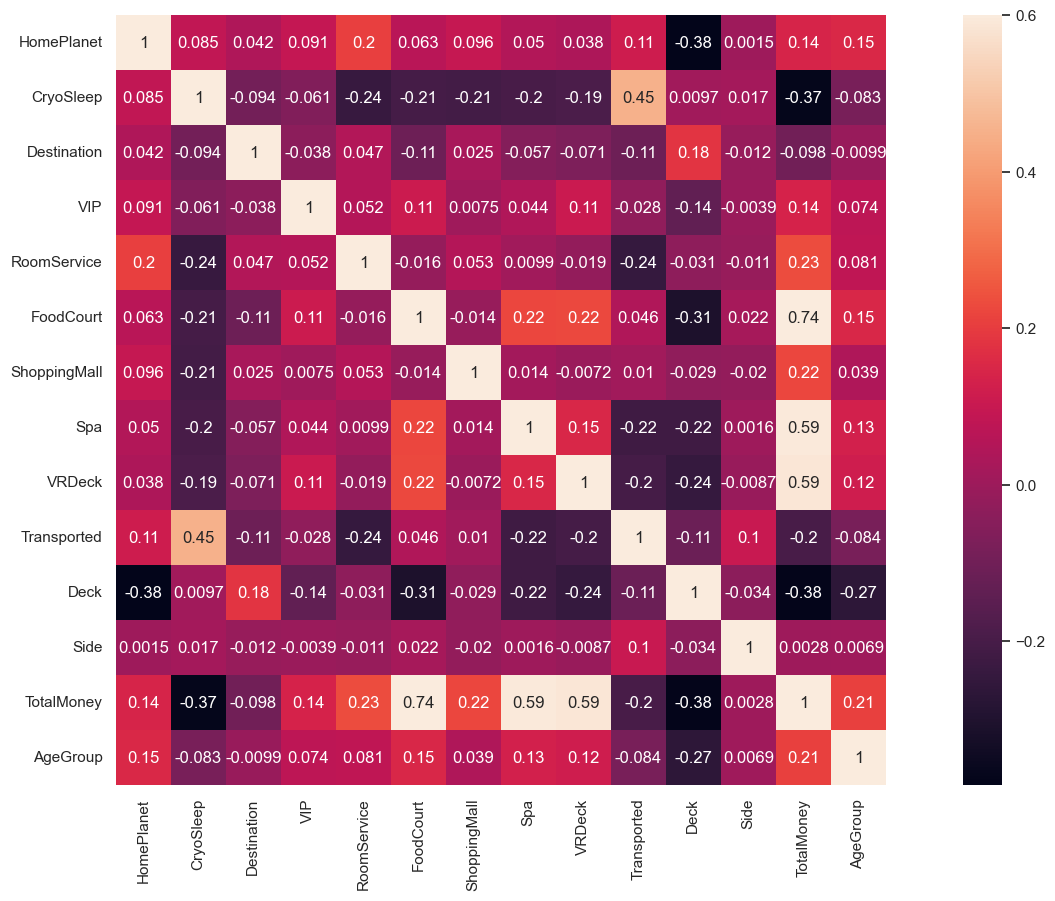

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(train1.corr(), vmax=0.6, square=True, annot=True)